## 패키지 설치

In [ ]:
# 나눔 폰트 설치

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## 구글드라이브 마운트 및 데이터 불러오기

In [ ]:
from google.colab import drive

ROOT = "/content/drive"   
print(ROOT)       
drive.mount(ROOT)

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

In [ ]:
%cd ./SBJ_2007_001

In [ ]:
%ls

 01.운영이력.csv
 02.자전거스테이션.csv
 03.꽃박람회일정.csv
 04.KINTEX행사일정.csv
 05.기상정보.csv
'06.인구(거주)분포도(100M_X_100M).geojson'
 07.인구통계.csv
'08.행정경계(시군구).geojson'
'09.행정경계(읍면동).geojson'
'10.도시계획(공간시설).geojson'
'11.도시계획(공공문화체육시설).geojson'
'11.도시계획(공공문화체육시설)_no골프장.geojson'
'12.도시계획(교통시설).geojson'
'13.용도지역지구(습지보호지역).geojson'
 14.고양시_지적도.geojson
 15.도로명주소_건물.geojson
 16.도로명주소_도로.geojson
'17.일반건물_분포도(100M_X_100M).geojson'
 18.행사장_공간정보.csv
 19.전철역_공간정보.csv
 20.고양시_버스정류소.csv
 21.버스_정류장별_승하차_정보.csv
 22.주차장정보.csv
 23.고양시덕양구_DEM.img
 24.고양시일산동구_DEM.img
 25.고양시일산서구_DEM.img
'26.고양시 공연장 박물관 정보.csv'
'27.고양시 체육시설 현황 정보.csv'
 28.코드정의서.xlsx
'29.지하철 역별 이용객수.csv'
 30.고양시_덕양구_

## 인구통계 불러오기

- 행정구역:    행정 구역 구분
- 조회기준:    조사한 연/월
- 총인구수:    총 인구 수
- 세대수:    세대 수
- 세대당 인구:    세대당 평균 인구
- 남자 인구수:    남자 총 인구 수
- 여자 인구수:    여자 총 인구 수
- 남여 비율:    남여 비율

In [ ]:
population = pd.read_csv('07.인구통계.csv')
population

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,경기도 고양시 (4128000000),2017년01월,"1,040,648","402,440",2.59,"511,353","529,295",0.97
1,경기도 고양시 (4128000000),2017년02월,"1,040,483","403,042",2.58,"511,266","529,217",0.97
2,경기도 고양시 (4128000000),2017년03월,"1,040,482","403,443",2.58,"511,182","529,300",0.97
3,경기도 고양시 (4128000000),2017년04월,"1,040,608","403,933",2.58,"511,225","529,383",0.97
4,경기도 고양시 (4128000000),2017년05월,"1,040,892","404,603",2.57,"511,347","529,545",0.97
...,...,...,...,...,...,...,...,...
1579,경기도 고양시 일산서구 송산동(4128759000),2019년08월,"50,610","18,390",2.75,"24,983","25,627",0.97
1580,경기도 고양시 일산서구 송산동(4128759000),2019년09월,"50,694","18,404",2.75,"25,025","25,669",0.97
1581,경기도 고양시 일산서구 송산동(4128759000),2019년10월,"50,660","18,398",2.75,"25,020","25,640",0.98
1582,경기도 고양시 일산서구 송산동(4128759000),2019년11월,"50,865","18,480",2.75,"25,112","25,753",0.98


In [ ]:
# 자료를 토대로 고양시 총인구 추이를 알아본다

population_all = population.loc[population['행정구역'].str.contains('4128000000', na=False)]
population_all

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,경기도 고양시 (4128000000),2017년01월,"1,040,648","402,440",2.59,"511,353","529,295",0.97
1,경기도 고양시 (4128000000),2017년02월,"1,040,483","403,042",2.58,"511,266","529,217",0.97
2,경기도 고양시 (4128000000),2017년03월,"1,040,482","403,443",2.58,"511,182","529,300",0.97
3,경기도 고양시 (4128000000),2017년04월,"1,040,608","403,933",2.58,"511,225","529,383",0.97
4,경기도 고양시 (4128000000),2017년05월,"1,040,892","404,603",2.57,"511,347","529,545",0.97
5,경기도 고양시 (4128000000),2017년06월,"1,041,375","405,641",2.57,"511,587","529,788",0.97
6,경기도 고양시 (4128000000),2017년07월,"1,041,587","406,314",2.56,"511,575","530,012",0.97
7,경기도 고양시 (4128000000),2017년08월,"1,041,507","406,768",2.56,"511,486","530,021",0.97
8,경기도 고양시 (4128000000),2017년09월,"1,041,399","407,272",2.56,"511,328","530,071",0.96
9,경기도 고양시 (4128000000),2017년10월,"1,041,706","407,871",2.55,"511,397","530,309",0.96


In [ ]:
population_all['총인구수'] = population_all['총인구수'].str.replace(',', '').astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


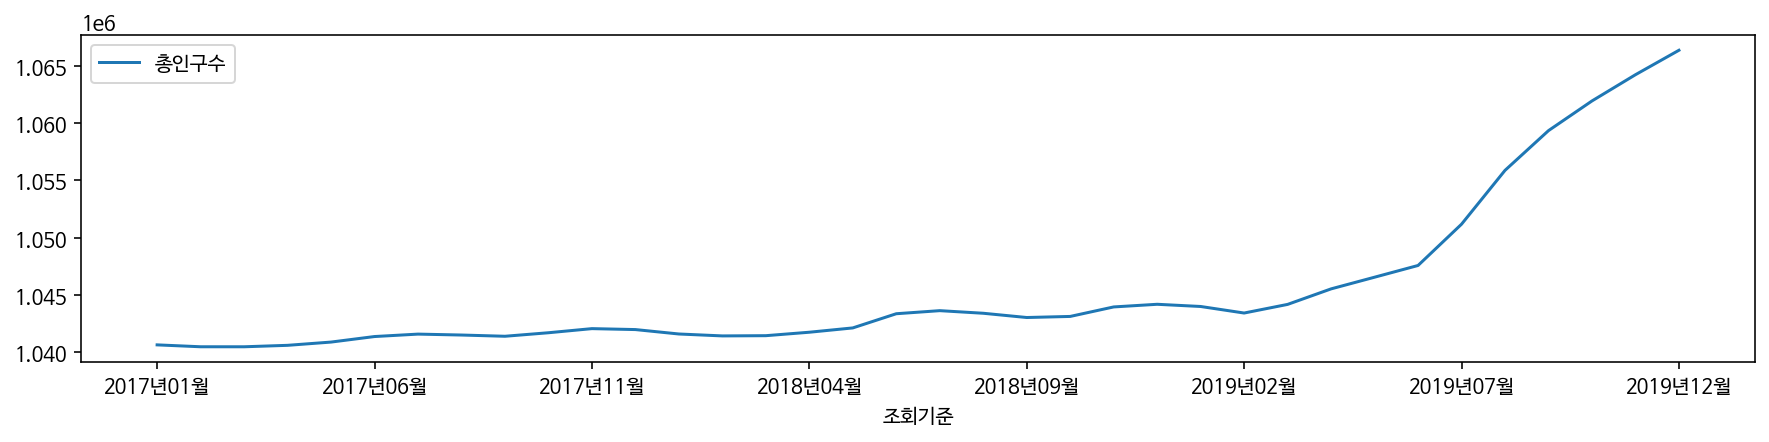

In [ ]:
population_all.plot(x ='조회기준', y='총인구수', kind = 'line',figsize=(15,3))

## 송산동 대화동 장항1동 데이터만 추출

In [ ]:
# 송산동부터

population_song = population.loc[population['행정구역'].str.contains('송산', na=False)] #na 파라미터는 결측값을 채워넣는 역할
population_song

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1548,경기도 고양시 일산서구 송산동(4128759000),2017년01월,"48,294","16,855",2.87,"23,893","24,401",0.98
1549,경기도 고양시 일산서구 송산동(4128759000),2017년02월,"48,456","16,938",2.86,"23,995","24,461",0.98
1550,경기도 고양시 일산서구 송산동(4128759000),2017년03월,"48,619","17,002",2.86,"24,060","24,559",0.98
1551,경기도 고양시 일산서구 송산동(4128759000),2017년04월,"48,837","17,080",2.86,"24,158","24,679",0.98
1552,경기도 고양시 일산서구 송산동(4128759000),2017년05월,"48,955","17,146",2.86,"24,216","24,739",0.98
1553,경기도 고양시 일산서구 송산동(4128759000),2017년06월,"49,045","17,198",2.85,"24,273","24,772",0.98
1554,경기도 고양시 일산서구 송산동(4128759000),2017년07월,"49,085","17,216",2.85,"24,270","24,815",0.98
1555,경기도 고양시 일산서구 송산동(4128759000),2017년08월,"49,104","17,221",2.85,"24,282","24,822",0.98
1556,경기도 고양시 일산서구 송산동(4128759000),2017년09월,"49,307","17,310",2.85,"24,376","24,931",0.98
1557,경기도 고양시 일산서구 송산동(4128759000),2017년10월,"49,473","17,407",2.84,"24,437","25,036",0.98


In [ ]:
population_song.shape

(36, 8)

In [ ]:
population_song.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1548 to 1583
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    36 non-null     object 
 1   조회기준    36 non-null     object 
 2   총인구수    36 non-null     object 
 3   세대수     36 non-null     object 
 4   세대당 인구  36 non-null     float64
 5   남자 인구수  36 non-null     object 
 6   여자 인구수  36 non-null     object 
 7   남여 비율   36 non-null     float64
dtypes: float64(2), object(6)
memory usage: 2.5+ KB


In [ ]:
population_song.describe()

,세대당 인구,남여 비율
count,36.000000,36.000000
mean,2.805278,0.978333
std,0.040882,0.003780
min,2.750000,0.970000
25%,2.767500,0.980000
50%,2.805000,0.980000
75%,2.842500,0.980000
max,2.870000,0.980000


In [ ]:
population_song.isnull().sum()

행정구역      0
조회기준      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64

In [ ]:
# 송산동 인구 추이를 알려면 그래프로 보면 편할듯
# 그런데 '총인구수'가 object로 되어있어서 float로 변환하면 편할듯
# 그럴라면 우선 쉼표를 없애줘야함
# 경고가 뜨는 에러가 발생하므로 경고를 무시하는 패키지를 설치한다

import warnings
warnings.filterwarnings(action='ignore')

population_song['총인구수'] = population_song['총인구수'].str.replace(',', '').astype(float)

In [ ]:
#다시 데이터타입 확인

population_song.dtypes # 바뀐것을 확인할 수 있다

행정구역       object
조회기준       object
총인구수      float64
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

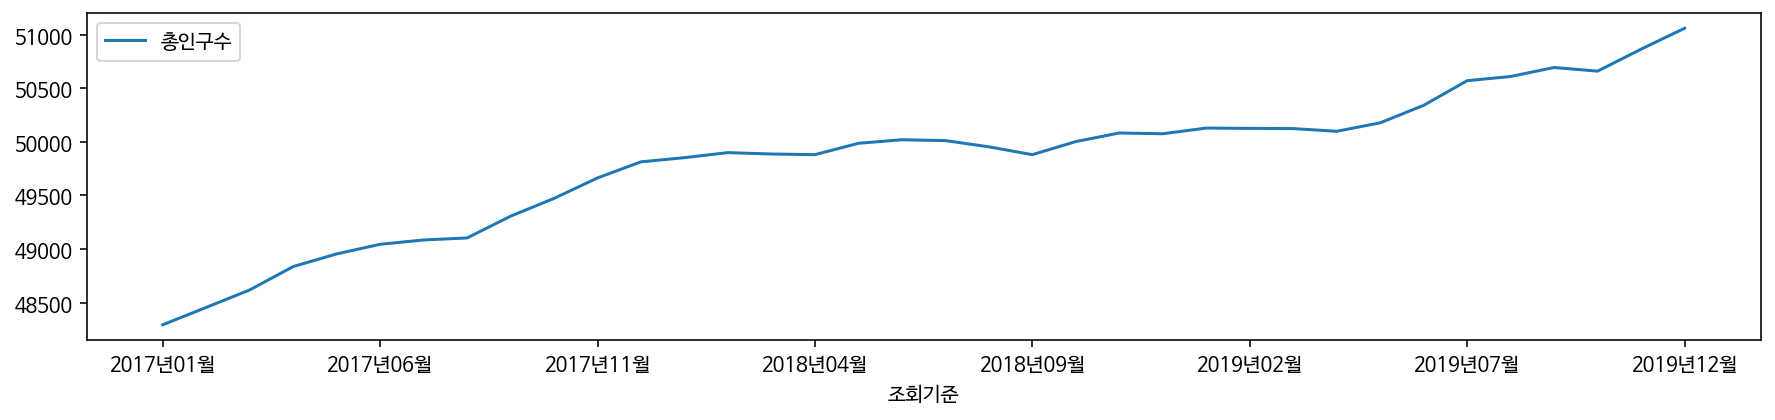

In [ ]:
population_song.plot(x ='조회기준', y='총인구수', kind = 'line',figsize=(15,3))

In [ ]:
# 대화동, 장항1동도 똑같이

population_dae = population.loc[population['행정구역'].str.contains('대화', na=False)]
population_dae

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1476,경기도 고양시 일산서구 대화동(4128757000),2017년01월,"33,108","13,781",2.40,"16,042","17,066",0.94
1477,경기도 고양시 일산서구 대화동(4128757000),2017년02월,"33,053","13,767",2.40,"16,004","17,049",0.94
1478,경기도 고양시 일산서구 대화동(4128757000),2017년03월,"33,047","13,790",2.40,"15,984","17,063",0.94
1479,경기도 고양시 일산서구 대화동(4128757000),2017년04월,"32,940","13,745",2.40,"15,949","16,991",0.94
1480,경기도 고양시 일산서구 대화동(4128757000),2017년05월,"32,870","13,742",2.39,"15,907","16,963",0.94
1481,경기도 고양시 일산서구 대화동(4128757000),2017년06월,"32,827","13,800",2.38,"15,878","16,949",0.94
1482,경기도 고양시 일산서구 대화동(4128757000),2017년07월,"32,836","13,829",2.37,"15,842","16,994",0.93
1483,경기도 고양시 일산서구 대화동(4128757000),2017년08월,"32,763","13,807",2.37,"15,793","16,970",0.93
1484,경기도 고양시 일산서구 대화동(4128757000),2017년09월,"32,697","13,793",2.37,"15,755","16,942",0.93
1485,경기도 고양시 일산서구 대화동(4128757000),2017년10월,"32,615","13,793",2.36,"15,733","16,882",0.93


In [ ]:
population_dae.shape

(36, 8)

In [ ]:
population_dae.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1476 to 1511
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    36 non-null     object 
 1   조회기준    36 non-null     object 
 2   총인구수    36 non-null     object 
 3   세대수     36 non-null     object 
 4   세대당 인구  36 non-null     float64
 5   남자 인구수  36 non-null     object 
 6   여자 인구수  36 non-null     object 
 7   남여 비율   36 non-null     float64
dtypes: float64(2), object(6)
memory usage: 2.5+ KB


In [ ]:
population_dae.describe()

,세대당 인구,남여 비율
count,36.000000,36.000000
mean,2.327778,0.933889
std,0.040926,0.004944
min,2.280000,0.930000
25%,2.297500,0.930000
50%,2.315000,0.930000
75%,2.362500,0.940000
max,2.400000,0.940000


In [ ]:
population_dae.isnull().sum()

행정구역      0
조회기준      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64

In [ ]:
population_dae['총인구수'] = population_dae['총인구수'].str.replace(',', '').astype(float)

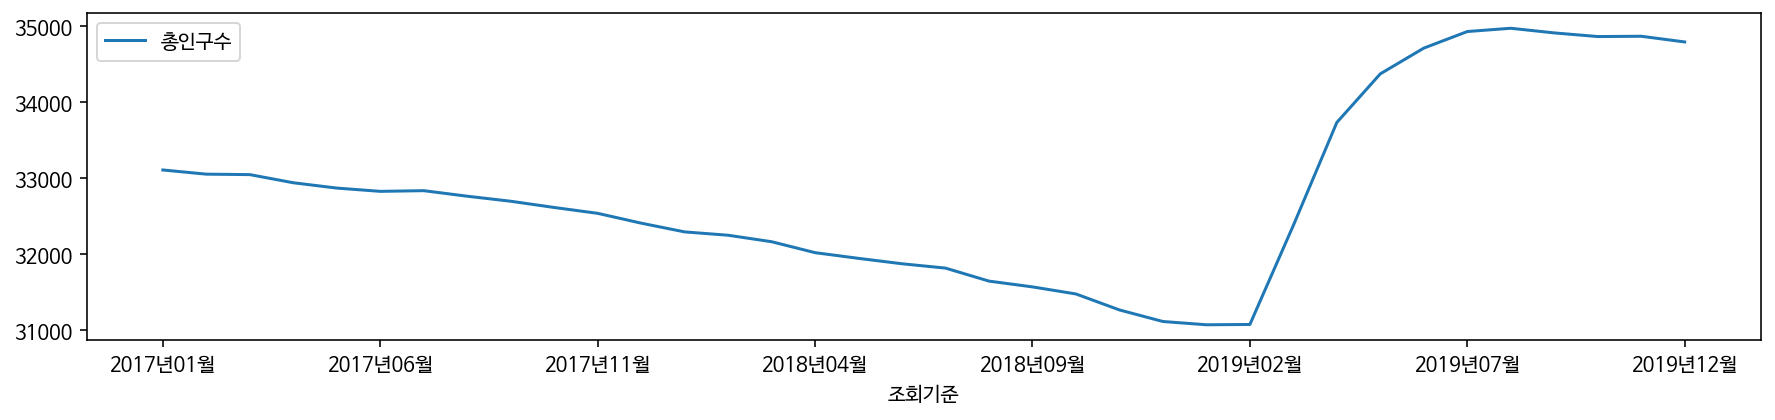

In [ ]:
population_dae.plot(x ='조회기준', y='총인구수', kind = 'line',figsize=(15,3))

In [ ]:
# 장항1동
population_jang1 = population.loc[population['행정구역'].str.contains('장항1', na=False)]
population_jang1

,행정구역,조회기준,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1116,경기도 고양시 일산동구 장항1동(4128558000),2017년01월,"3,077","1,611",1.91,"1,723","1,354",1.27
1117,경기도 고양시 일산동구 장항1동(4128558000),2017년02월,"3,067","1,610",1.90,"1,719","1,348",1.28
1118,경기도 고양시 일산동구 장항1동(4128558000),2017년03월,"3,084","1,620",1.90,"1,734","1,350",1.28
1119,경기도 고양시 일산동구 장항1동(4128558000),2017년04월,"3,078","1,616",1.90,"1,729","1,349",1.28
1120,경기도 고양시 일산동구 장항1동(4128558000),2017년05월,"3,093","1,622",1.91,"1,739","1,354",1.28
1121,경기도 고양시 일산동구 장항1동(4128558000),2017년06월,"3,099","1,633",1.90,"1,750","1,349",1.30
1122,경기도 고양시 일산동구 장항1동(4128558000),2017년07월,"3,096","1,635",1.89,"1,749","1,347",1.30
1123,경기도 고양시 일산동구 장항1동(4128558000),2017년08월,"3,079","1,634",1.88,"1,746","1,333",1.31
1124,경기도 고양시 일산동구 장항1동(4128558000),2017년09월,"3,093","1,639",1.89,"1,748","1,345",1.30
1125,경기도 고양시 일산동구 장항1동(4128558000),2017년10월,"3,108","1,643",1.89,"1,754","1,354",1.30


In [ ]:
population_jang1.shape

(36, 8)

In [ ]:
population_jang1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1116 to 1151
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    36 non-null     object 
 1   조회기준    36 non-null     object 
 2   총인구수    36 non-null     object 
 3   세대수     36 non-null     object 
 4   세대당 인구  36 non-null     float64
 5   남자 인구수  36 non-null     object 
 6   여자 인구수  36 non-null     object 
 7   남여 비율   36 non-null     float64
dtypes: float64(2), object(6)
memory usage: 2.5+ KB


In [ ]:
population_jang1.describe()

,세대당 인구,남여 비율
count,36.000000,36.000000
mean,1.928611,1.268611
std,0.148596,0.061326
min,1.830000,1.070000
25%,1.870000,1.270000
50%,1.885000,1.290000
75%,1.900000,1.300000
max,2.420000,1.320000


In [ ]:
population_jang1.isnull().sum()

행정구역      0
조회기준      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64

In [ ]:
population_jang1_2 = population_jang1.copy()
population_jang1_2['총인구수'] = population_jang1_2['총인구수'].str.replace(',', '').astype(float)

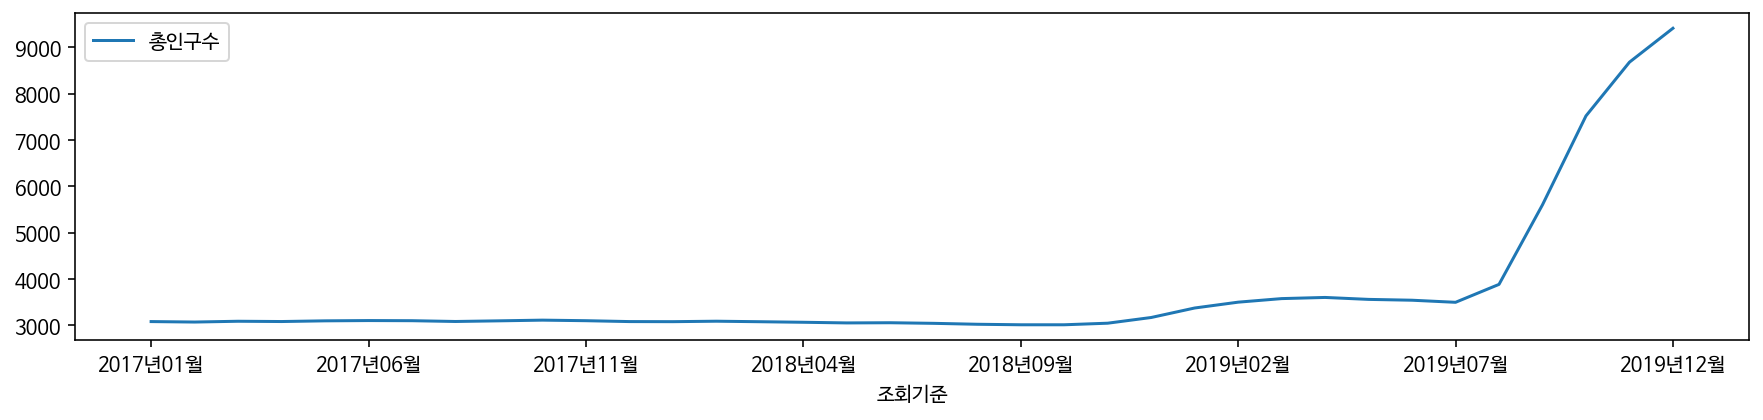

In [ ]:
population_jang1_2.plot(x ='조회기준', y='총인구수', kind = 'line',figsize=(15,3))